# Optimization Methods
## Gradient Descent
### Objectives

At the end of the day you should be able to:

1. Know the purpose of gradient descent, and name some specific applications we already know.
1. Write pseudocode of the gradient descent and stochastic gradient descent algorithms.
1. Compare and contrast batch and stochastic gradient descent - the algorithms, costs, and benefits.
1. Draw Gradient Descent cartoons!


# Motivation

Generally: find the minimum or maximum of a function.

## Example 1:

Find the parameters of a model which maximize the likelihood of data.

## Example 2:

Find the parameters of a model which minimize a cost function.

# What can we optimize?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

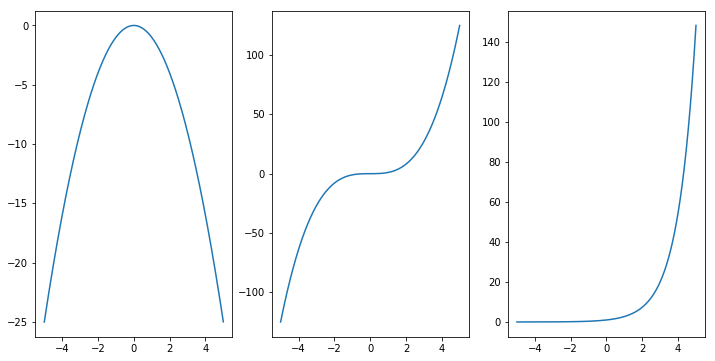

In [2]:
x = np.arange(-5,5, .001)
funcs = [-(x**2), x**3, np.exp(x)]
fig, subps = plt.subplots(1,len(funcs))
fig.set_size_inches(12,6)
for ax, func in zip(subps, funcs):
    ax.plot(x, func)

# Cost functions

## Linear Regression

$$ J(\theta) = \frac{1}{N}\sum_{i=1}^N (y_i - h_\theta(x_i))^2 $$

## Logistic Regression

$$ \text{Log likelihood} = \ln p(\vec{y}|X;\theta) = \sum_{i=1}^N (y_i \ln h_\theta (x_i) + (1- y_i)\ln(1- (h_\theta (x_i))) $$

# Finding an optimium

## Ideal world: 
- take the derivative of the cost function
- set it to zero
- solve for parameters

## Real world:
- realize there is no analytic solution
- cry
- guess a set of parameter values
- take the derivative of the cost function
- use it inform your next guess
- repeat

# The Gradient
* Let's say we have a function $f$ of $p$ variables:
$$f(\theta_1, \theta_2, \ldots, \theta_p) = f(\vec{\theta})$$
* The gradient is the multivariate analogue of the derivative: it is the vector of partial derivatives $\partial f / \partial \theta_j$
* Geometrically the gradient is the direction of steepest descent.

$$ \vec{\nabla_\theta}f = \sum_{j=1}^p\frac{\partial f}{\partial \theta_j} \vec{e_j}$$

where $\vec{e_j}$ is the basis vector pointing along axis $\theta_j$

How can we use the direction of steepest descent to find the minimum of our function?

How about the maximum?

# Gradient Descent Algorithm

Follow the direction of steepest descent until convergence.

But the gradient gives us the _direction_ of steepest descent, how do we choose the _size_ of the update to make to the parameter?

# Gradient Descent Algorithm
- guess a set of starting values for the parameters, $\vec{\theta}_0$
- evaluate the partial derivatives $\partial f / \partial \theta_j$ (which will also be functions of all the parameters $\vec{\theta}$) at $\vec{\theta}_0$. This will be different for each parameter $\theta_j$, so let's call this value $\delta_{0,j} = \left. \frac{\partial f}{\partial \theta_j}\right\vert_{\vec{\theta}_0}$
- update the guess for each parameter like this: $\theta_{1,j} = \theta_{0,j} - \alpha \delta_{0,j}$
- repeat the previous two steps (evaluating the gradient at the current parameter values, then updating the parameter values) until you're satisfied (see "convergence criteria" below)

$\alpha$ is the **learning rate**, it tunes the size of the parameter update at each step.

$$ \theta_{i+1, j} = \theta_{i, j} - \alpha \left. \frac{\partial f(\vec\theta)}{\partial \theta_j}\right\vert_{\vec{\theta_i}} $$

* $ \alpha $: Learning rate
* $ i $: Iteration
* $ j $: Feature

# Pseudo code

```python
new_params = dict((i,0) for i in range(k)) #Initialize parameters
while not has_converged:
    params = copy(new_params)
    for theta in params:
        new_params[theta] -= learning_rate * gradient(theta, params)
```

# Gradient Descent Convergence Criterion
* Max number of iterations ("stop after 10,000 steps")
* pick a threshold for the change in cost function: $ (cost_{old} - cost_{new})/cost_{old} < \epsilon $
* pick a threshold for the magnitude of the gradient

# Demonstration: see plotting notebook

# Caveats

* Requires differentiable, convex function
* Only finds global optimum on globally convex function
* Converges linearly for strongly convex functions.
* May not converge for weakly convex functions.
* Requires feature scaling
* Learning rate must be chosen (well)


# Stochastic Gradient Descent

## Motivation
Problems with Gradient Descent

* Memory (data needs to fit)
* Processor (cost function over all rows is expensive)
* Online (making updates requires complete restart)


## Intuition

Remember the linear regression cost function:
    
$$ J(\theta) = \frac{1}{N}\sum_{i=1}^N (y_i - h_\theta(x_i))^2 $$

The _expected cost_ of a single randomly chosen observation is the same!

# SGD

Use a cost function based on a single randomly chosen observation:

$$ J(\theta) = (y_i - h_\theta(x_i))^2 $$

# Why use SGD?

* Big data
* Converges faster on average the GD
* Can work online

# Other flavors

* "batch" is sometimes used to refer to regular GD.
* guess what minibatch is?
* Online SGD: take a step every time you get a new observation
 * Optionally subset old observations

# Newton-Raphson Method

A fancy way of choosing our learning rate $\alpha$ in GD.

$$ \theta_{i+1} = \theta_i - \frac{1}{J''(\theta)}J'(\theta) $$

# Multivariate Newton-Raphson

$$ \theta_{i+1} = \theta_{i} - [H(f(x)]^{-1}\nabla f(x) $$

What might prevent us from using this?

* Hessian has to be computed, and inverted.
* Can diverge with a bad starting position.

# The universally best optimization method to always use

In [3]:
with open('the_universally_best_optimization_method_to_always_use.secret') as f:
    use(f)

FileNotFoundError: [Errno 2] No such file or directory: 'the_universally_best_optimization_method_to_always_use.secret'

# Why should I care?

Q: Will you ever invent a new cost function that you need to optimize directly?

A: Not too often

But, optimization underlies everything we do as data scientists, so understanding these concerns will help you use high-level tools. Knowing what optimization approach is used for different methods is a good signal of competence.

In [ ]:
import sklearn.linear_model as lm
help(lm.LogisticRegression)